# Helper functions

In [1]:
import numpy as np
def generate_data_schema_1(a):
    n = 1000
    y = np.random.binomial(1, 0.5, n)
    X = np.zeros((n, 2))
    # Assign features based on the class
    for i in range(n):
        if y[i] == 0:
            X[i] = np.random.normal(0, 1, 2)
        else:
            X[i] = np.random.normal(a, 1, 2)
    return X, y

def generate_data_schema_2(a,p):
    n= 1000
    y = np.random.binomial(1, 0.5, n)
    rho = p
    X = np.zeros((n, 2))
    # Covariance matrix for class 0 and class 1
    cov_0 = np.array([[1, rho], [rho, 1]])  # Variance 1, correlation rho
    cov_1 = np.array([[1, -rho], [-rho, 1]]) 
    for i in range(n):
        if y[i] == 0:
            X[i, :] = np.random.multivariate_normal([0,0], cov_0)
        else:
            X[i, :] = np.random.multivariate_normal([a, a], cov_1)
    return X, y
        
    

# Generate data

# Scheme 1

In [2]:
import numpy as np
a = 0.1
p = 0.5
X, y = generate_data_schema_2(a, p)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LDA

In [4]:
from LDA import LDA
lda = LDA()
lda.fit(X_train, y_train)
lda_res = lda.predict(X_test)
print('Accuracy:', np.mean(lda_res == y_test))

Accuracy: 0.485


# QDA

In [5]:
from QDA import QDA
qda = QDA()
qda.fit(X_train, y_train)
qda_res = qda.predict(X_test)
print('Accuracy:', np.mean(qda_res == y_test))

Accuracy: 0.59


# NB

In [6]:
from NB import NB
nb = NB()
nb.fit(X_train, y_train)
nb_res = nb.predict(X_test)
print('Accuracy:', np.mean(nb_res == y_test))

Accuracy: 0.44


# Comparing sets with different "a" values schema 1


## Obtain accuracies

In [7]:
a_values = [0.1,0.5,1,2,3,5]
number_of_iterations = 20
res_schema1 = np.zeros((3, len(a_values), number_of_iterations )) #lda, qda, nb
for iterator_a, a_value in enumerate(a_values):
    for i in range(number_of_iterations):
        X, y = generate_data_schema_1(a_value)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lda.fit(X_train, y_train)
        lda_res = lda.predict(X_test)
        res_schema1[0, iterator_a, i] = np.mean(lda_res == y_test)
        qda.fit(X_train, y_train)
        qda_res = qda.predict(X_test)
        res_schema1[1, iterator_a, i] = np.mean(qda_res == y_test)
        nb.fit(X_train, y_train)
        nb_res = nb.predict(X_test)
        res_schema1[2, iterator_a, i] = np.mean(nb_res == y_test)


In [8]:
import matplotlib.pyplot as plt

def plot_boxplots(res, labels, name):
    min_val = np.min(res)


    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot data on each subplot
    axs[0].boxplot(res[0,:,:].T, labels=labels)
    axs[0].set_title('LDA', fontsize=16)
    axs[0].set_xlabel("a", fontsize=14)
    axs[0].set_ylabel("accuracy", fontsize=14)
    axs[0].grid()
    axs[0].set_ylim(min_val-0.03,1+0.03)

    axs[1].boxplot(res[1,:,:].T, labels=labels)
    axs[1].set_title('QDA', fontsize=16)
    axs[1].set_xlabel("a", fontsize=14)
    axs[1].set_ylabel("accuracy", fontsize=14)
    axs[1].grid()
    axs[1].set_ylim(min_val-0.03,1+0.03)


    axs[2].boxplot(res[2,:,:].T, labels=labels)
    axs[2].set_title('NB', fontsize=16)
    axs[2].set_xlabel("a", fontsize=14)
    axs[2].set_ylabel("accuracy", fontsize=14)
    axs[2].grid()

    axs[2].set_ylim(min_val-0.03,1+0.03)
    plt.tight_layout()
    plt.savefig(f"{name}.pdf")


    plt.show()

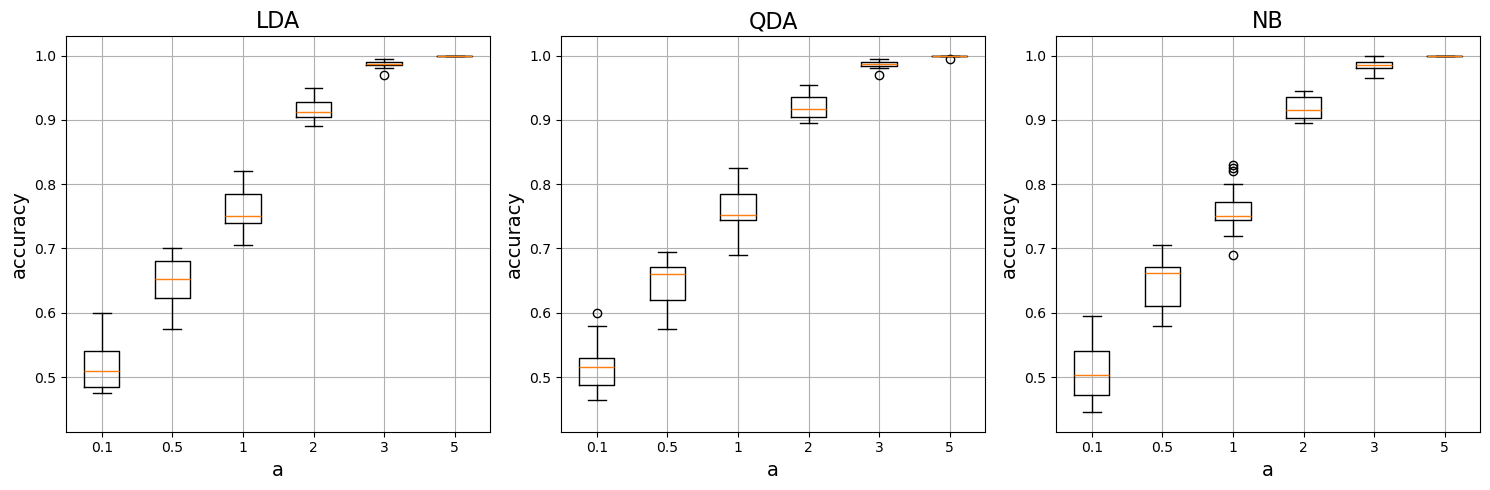

In [9]:
plot_boxplots(res_schema1, a_values, "different_a_schema1")

# Comparing sets with different "a" values schema 2


## Obtain accuracies

In [10]:
a_values = [0.1,0.5,1,2,3,5]
p = 0.5
number_of_iterations = 20
res_schema2 = np.zeros((3, len(a_values), number_of_iterations )) #lda, qda, nb
for iterator_a, a_value in enumerate(a_values):
    for i in range(number_of_iterations):
        X, y = generate_data_schema_2(a_value, p)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lda.fit(X_train, y_train)
        lda_res = lda.predict(X_test)
        res_schema2[0, iterator_a, i] = np.mean(lda_res == y_test)
        qda.fit(X_train, y_train)
        qda_res = qda.predict(X_test)
        res_schema2[1, iterator_a, i] = np.mean(qda_res == y_test)
        nb.fit(X_train, y_train)
        nb_res = nb.predict(X_test)
        res_schema2[2, iterator_a, i] = np.mean(nb_res == y_test)


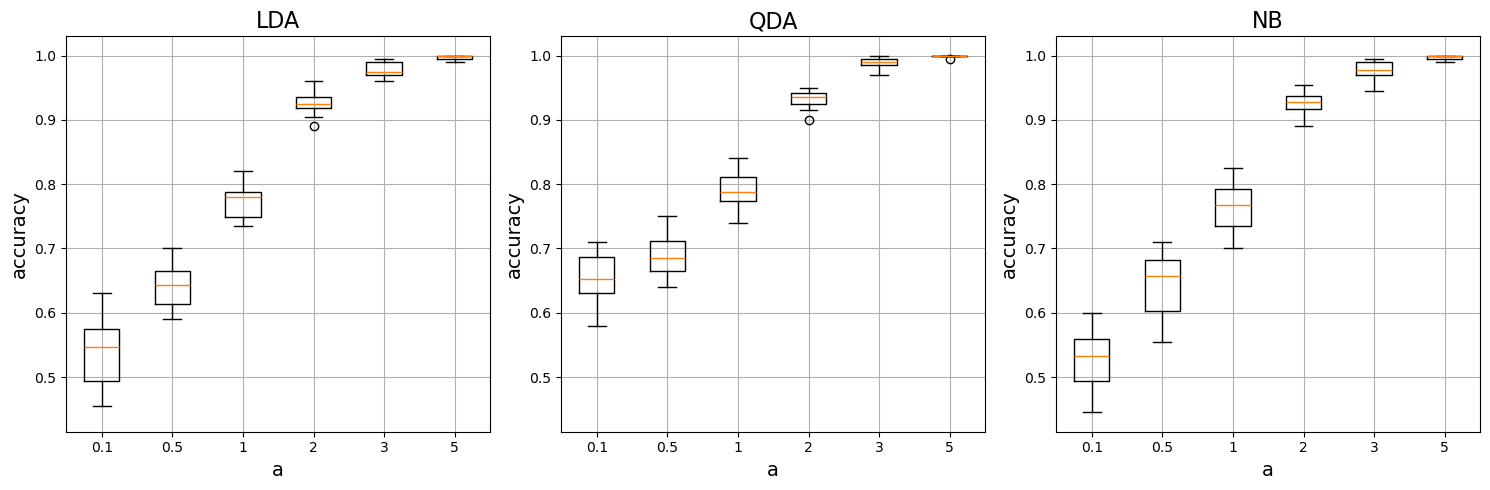

In [11]:
plot_boxplots(res_schema2,a_values, "different_a_schema2")

# Comparing sets with different "p" values schema 2


In [12]:
a_value = 2
p_values = [0,0.1,0.3,0.5,0.7,0.9]
number_of_iterations = 20
res_schema2_test_2 = np.zeros((3, len(p_values), number_of_iterations )) #lda, qda, nb
for iterator_p, p_value in enumerate(p_values):
    for i in range(number_of_iterations):
        X, y = generate_data_schema_2(a_value, p_value)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lda.fit(X_train, y_train)
        lda_res = lda.predict(X_test)
        res_schema2_test_2[0, iterator_p, i] = np.mean(lda_res == y_test)
        qda.fit(X_train, y_train)
        qda_res = qda.predict(X_test)
        res_schema2_test_2[1, iterator_p, i] = np.mean(qda_res == y_test)
        nb.fit(X_train, y_train)
        nb_res = nb.predict(X_test)
        res_schema2_test_2[2, iterator_p, i] = np.mean(nb_res == y_test)


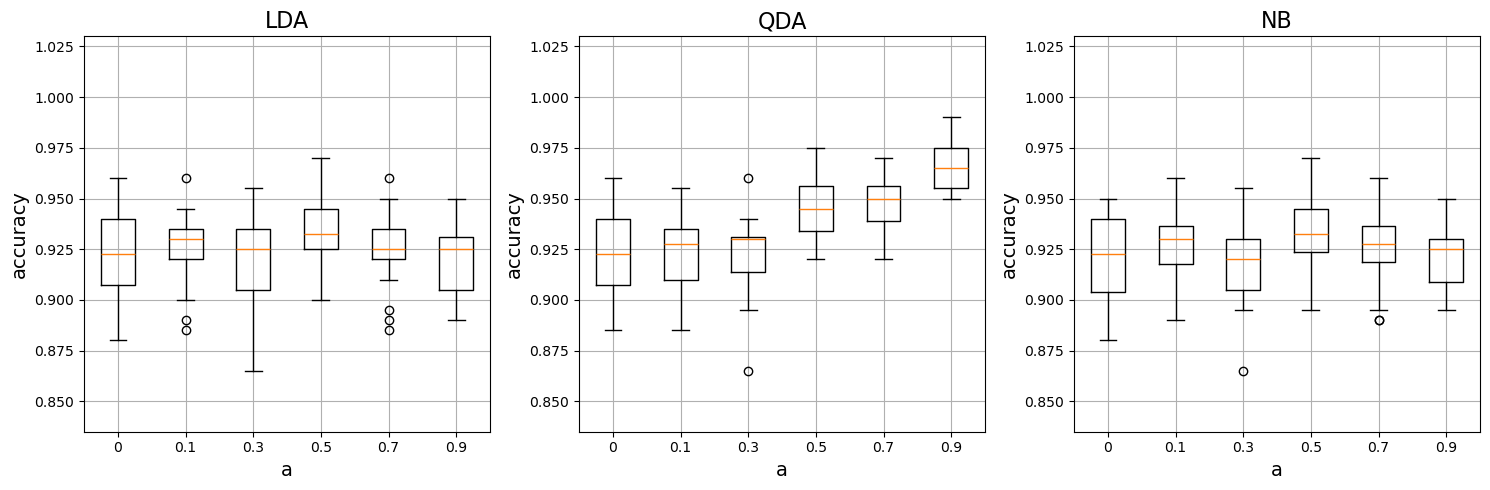

In [13]:

plot_boxplots(res_schema2_test_2, p_values, "different_p_schema2")

# Scatterplot with LDA and QDA lines

In [14]:
a_value = 2
p_value = 0.5
X, y = generate_data_schema_2(a_value, p_value)
lda.fit(X,y)
qda.fit(X,y)




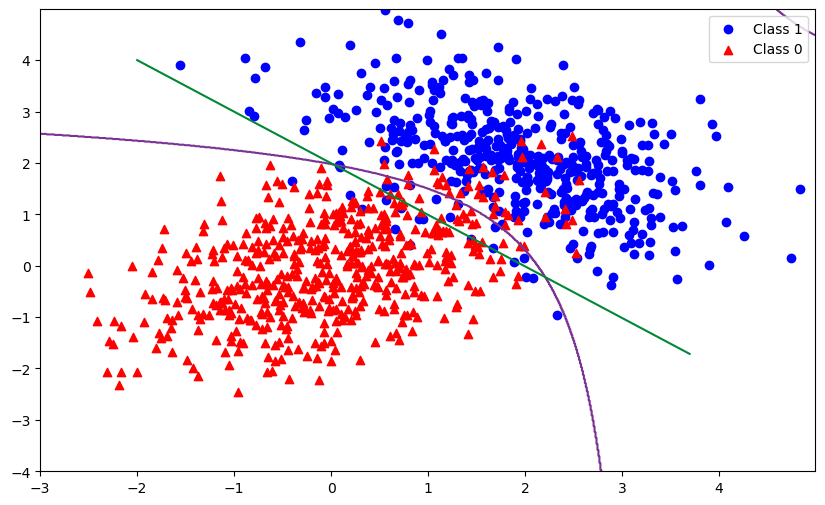

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", marker="^", label="Class 0")
xx, yy = np.meshgrid(np.arange(-3, 5, 0.01), np.arange(-4, 5, 0.01))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cont = plt.contour(xx, yy, Z, levels=[0.5], colors='#7b3294') #QDA
x1,x2,y1,y2=lda.get_line()
line = plt.plot([x1,y1], [x2,y2], color="#008837") #LDA
plt.legend()
plt.savefig("decision_boundary.pdf")
plt.show()


# External Data

In [16]:
import pandas as pd
#https://www.kaggle.com/datasets/vikasukani/diabetes-data-set
diabetes_data = pd.read_csv("./datasets/diabetes-dataset.csv")

#https://www.openml.org/search?type=data&status=active&id=334
monkey_data = pd.read_csv("./datasets/monkey_dataset.csv")


#https://www.kaggle.com/datasets/erdemtaha/cancer-data
cancer_data = pd.read_csv("./datasets/cancer_data.csv")



In [17]:
def create_boxplot_natural_data(X, y, test_sizes, name):
  lda_accuracy = np.zeros((10, len(test_sizes)))
  qda_accuracy = np.zeros((10, len(test_sizes)))
  nb_accuracy = np.zeros((10, len(test_sizes)))
  for j, test_size in enumerate(test_sizes):
    for i in range(10):
      Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size)
      lda.fit(Xtrain, ytrain)
      lda_accuracy[i,j] = np.mean(lda.predict(Xtest) == ytest)
      qda.fit(Xtrain, ytrain)
      qda_accuracy[i,j] = np.mean(qda.predict(Xtest)== ytest)
      nb.fit(Xtrain, ytrain)
      nb_accuracy[i,j] = np.mean(nb.predict(Xtest)== ytest)

  import matplotlib.pyplot as plt

  fig, axs = plt.subplots(1, 3, figsize=(15, 5))

  # LDA
  axs[0].boxplot(lda_accuracy, labels=["0.1", "0.3", "0.8"])
  axs[0].set_title("LDA")
  axs[0].set_xlabel("Test Size")
  axs[0].set_ylabel("Accuracy")

  # QDA
  axs[1].boxplot(qda_accuracy, labels=["0.1", "0.3", "0.8"])
  axs[1].set_title("QDA")
  axs[1].set_xlabel("Test Size")
  axs[1].set_ylabel("Accuracy")

  # # NB
  axs[2].boxplot(nb_accuracy, labels=["0.1", "0.3", "0.8"])
  axs[2].set_title("NB")
  axs[2].set_xlabel("Test Size")
  axs[2].set_ylabel("Accuracy")

  plt.tight_layout()
  plt.savefig(f"{name}.pdf")
  plt.show()
      


# Diabetes dataset

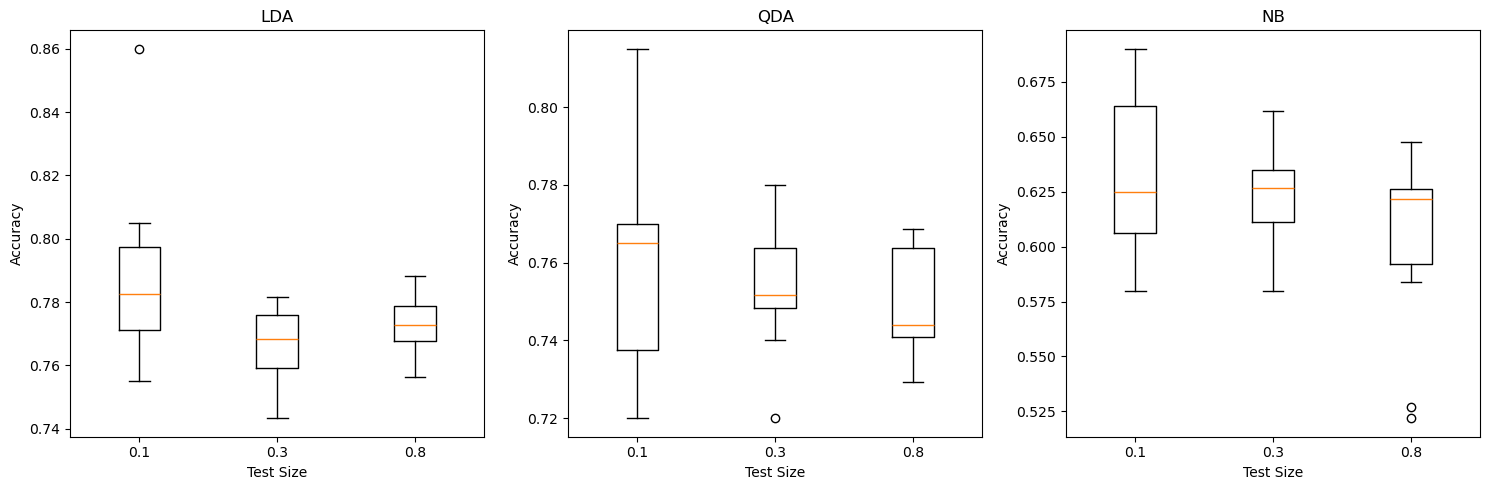

In [18]:
# Diabetes
test_sizes = [0.1, 0.3, 0.8]

y = diabetes_data["Outcome"].values
X = diabetes_data.iloc[:, :-1].values

create_boxplot_natural_data(X, y, test_sizes, "diabetes_boxplot")

## Monkeys dataset

(601, 6)


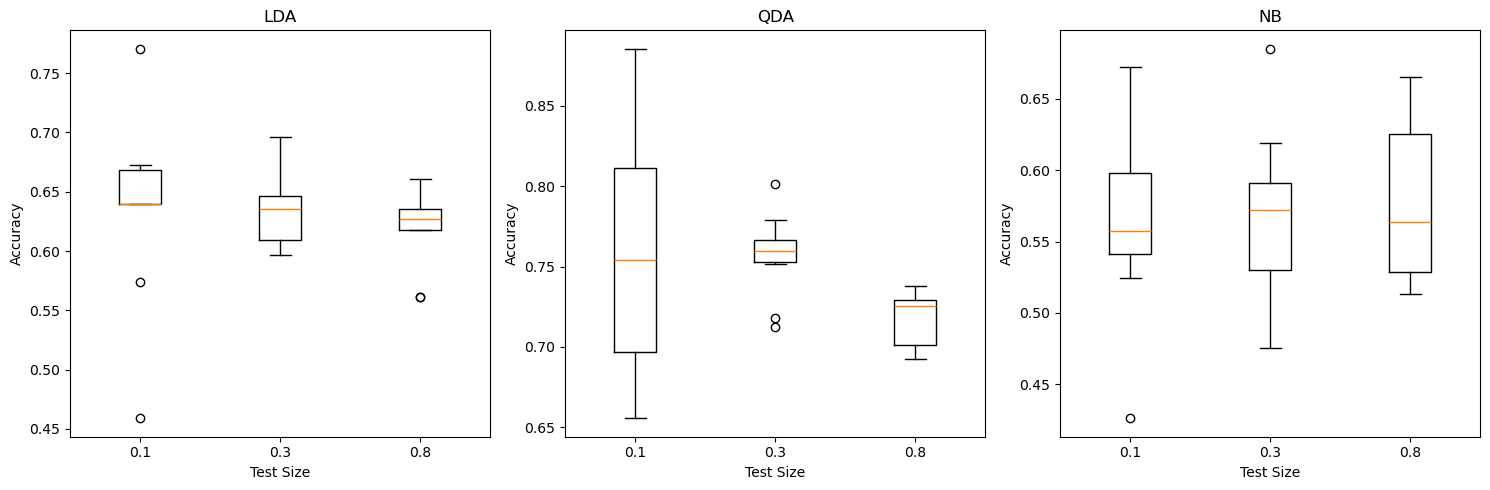

In [19]:
# Monkeys
test_sizes = [0.1, 0.3, 0.8]

y = monkey_data["'class'"].values
X = monkey_data.iloc[:, 2:].values

print(X.shape)

create_boxplot_natural_data(X, y, test_sizes, "monkeys_boxplot")

## Breast cancer dataset

(569, 31)


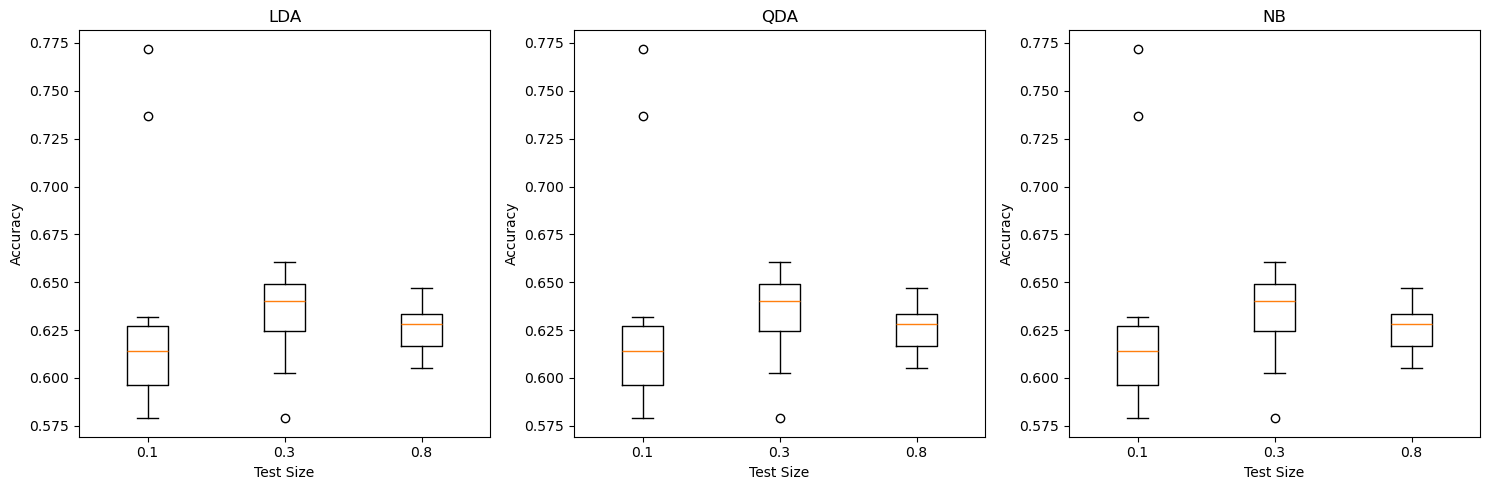

In [20]:
# cancer
test_sizes = [0.1, 0.3, 0.8]

y = cancer_data["diagnosis"].values
y = (y == "M").astype(int)
X = cancer_data.iloc[:, 2:].values

print(X.shape)

create_boxplot_natural_data(X, y, test_sizes, "cancer_boxplot")